In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
data = pd.read_csv('winequality.csv')

In [17]:
data 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
data['quality'] = data['quality'].apply(lambda x: 0 if x<= 5 else 1)

In [19]:
data[1400:1599]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1400,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9,0
1401,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9,0
1402,7.6,0.300,0.42,2.0,0.052,6.0,24.0,0.99630,3.44,0.82,11.9,1
1403,7.2,0.330,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,1
1404,8.0,0.500,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
X = np.array(data[['volatile acidity','alcohol']].values)
y = np.array(data['quality'].values)

In [23]:
good = data.loc[y == 1]
bad = data.loc[y==0]

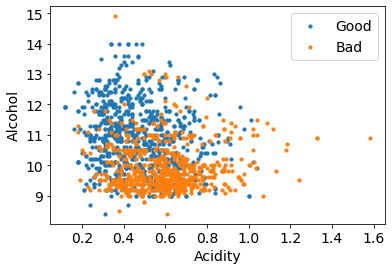

In [26]:
# plot the data to visualise a boundary
plt.scatter(good.iloc[:, 1], good.iloc[:, 10], s=10, label='Good')
plt.scatter(bad.iloc[:, 1], bad.iloc[:, 10], s=10, label='Bad')
plt.legend(fontsize=14)
plt.xlabel('Acidity',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Alcohol', fontsize=14)
plt.show()

In [27]:
#MODELING

In [28]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [33]:
def model(X,y,alpha,epochs):
    m = X.shape[0]
    n = X.shape[1]
    
    y = y.reshape(m,1)
    
    w = np.zeros((n,1))
    b = 0
    
    J = []
    
    for i in range(epochs):
        a = sigmoid(np.dot(X,w) + b)
        
        dw = (1/m) * np.dot(X.T, (a-y))
        db = (1/m) * np.sum((a-y))
        
        w = w - alpha * dw
        b = b - alpha * db 
        
        cost = (-1/m) * np.sum(y*np.log(a) + (1-y)*np.log(1-a))
        J.append(cost)
        
    return w, b, J 
        

In [49]:
alpha = 0.01
epochs = 300000

w, b, J = model(X, y, alpha, epochs)

In [50]:
w

array([[-3.56976367],
       [ 0.98788456]])

In [51]:
b

-8.156062723385784

In [52]:
J[:10]

[0.6931471805599452,
 0.6901066612455332,
 0.6885093510481752,
 0.6876645013828844,
 0.6872123697400014,
 0.6869655542394638,
 0.6868262679347776,
 0.6867433842182749,
 0.686690123167076,
 0.6866524359737085]

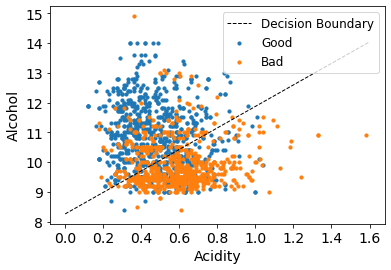

In [53]:
c = -b/w[1]
m = -w[0]/w[1]

xmin, xmax = 0, 1.6
ymin, ymax = 8, 15
xd = np.array([xmin, xmax])
yd = m*xd + c

# plot the line with the data
plt.plot(xd, yd, 'k', lw=1, ls='--',label='Decision Boundary')
plt.scatter(good.iloc[:, 1], good.iloc[:, 10], s=10, label='Good')
plt.scatter(bad.iloc[:, 1], bad.iloc[:, 10], s=10, label='Bad')
plt.legend(fontsize=12)
plt.xlabel('Acidity',fontsize=14)
plt.ylabel('Alcohol',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [54]:
#Model Evaluation

In [57]:
def acc(X, w, b, y):
    y_hat = sigmoid(np.dot(X,w) + b)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in y_hat]
    
    accuracy = np.sum(y == pred_class)/len(y)
    
    return print("the accuracy is", accuracy*100, "%")

In [58]:
acc(X,w,b,y)

the accuracy is 73.92120075046904 %
